In [1]:
import numpy as np  
import matplotlib.pyplot as plt


In [2]:
def CalcPotential(N, V0, tol, pos):
    Vk = V0.copy()
    while True:
        Vm1 = Vk.copy()
        for i in range(1, N-1):
            for j in range(1, N-1):
                Vk[i, j] = 0.25 * (Vk[i+1, j] + Vk[i-1, j] + Vk[i, j+1] + Vk[i, j-1])
        Vk[int(N*0.25):int(N*0.75), pos[0]] = 1
        Vk[int(N*0.25):int(N*0.75), pos[1]] = -1
        
        if np.allclose(Vm1, Vk, atol=tol):
            break
    return Vk


In [3]:
def CalcElectricField(V, N):
    Ex, Ey = [], []
    
    for i in range(0, N):
        Ex.append(-np.gradient(V[i]))

    for i in range(0, N):
        trsp = np.transpose(V)[i]
        Ey.append(-np.gradient(trsp))

    return np.array(Ex), np.transpose(np.array(Ey))


The heatmap shows the potential in a box with two plates with potential one and minus one.

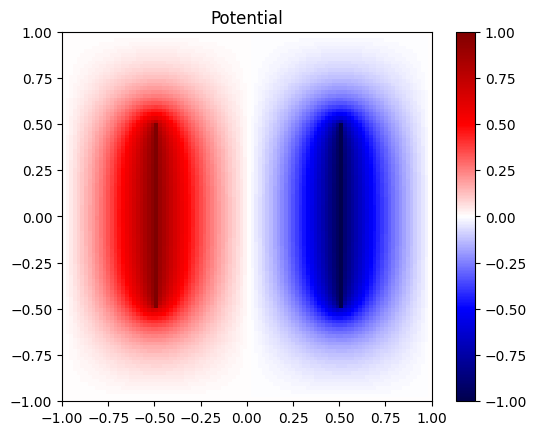

In [4]:
N = 100
tol = 1e-4
tol = 1e-3
pos = [25, 75]
V0 = np.zeros((N, N))
V0[int(N*0.25):int(N*0.75), pos[0]] = 1
V0[int(N*0.25):int(N*0.75), pos[1]] = -1

V = CalcPotential(N, V0, tol, pos)
plt.imshow(V, extent=[-1, 1, -1, 1], cmap='seismic')
plt.title('Potential')
plt.colorbar()


The vector field shows electric field of two plates with potential with value one and minus one.

1.0


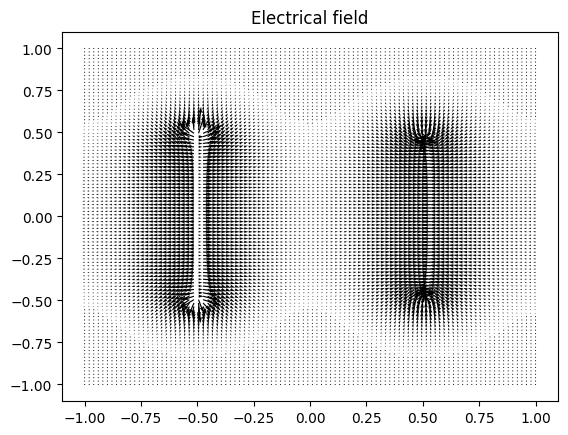

In [5]:
Ex, Ey = CalcElectricField(V, N)
xv, yv = np.meshgrid(np.linspace(-1, 1, N), np.linspace(-1, 1, N)) 

fig, ax = plt.subplots()
qq = plt.quiver(xv, yv, Ex, Ey)
ax.set_title('Electrical field')
print(V[50, 25])
plt.show()


The graph shows the electric field strength in the point (0, 0.6) for different values of d, the distance between the plates.

Text(0, 0.5, 'Field strength')

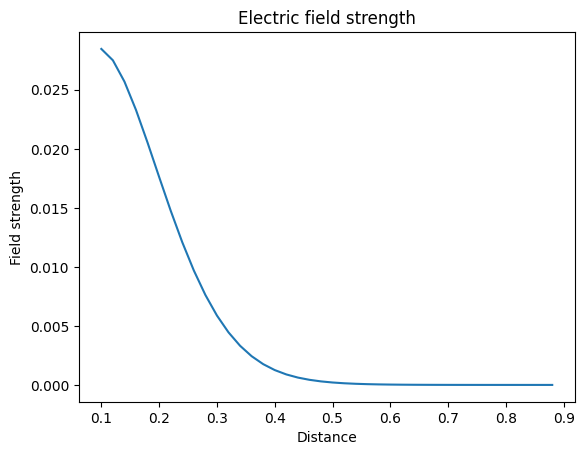

In [6]:
tol = 5e-3
res, D = [], []
for d in range(5, 45, 1):
    V0 = np.zeros((N, N))
    V0[int(N*0.25):int(N*0.75), 50 - d] = 1
    V0[int(N*0.25):int(N*0.75), 50 + d] = -1
    V = CalcPotential(N, V0, tol, [50 - d, 50 + d])
    Ex, Ey = CalcElectricField(V, N)

    res.append(np.sqrt(Ex[int(N*0.8), int(N*0.5)]**2 + Ey[int(N*0.8), int(N*0.5)]**2))
    D.append(d*2/N)

plt.plot(D, res)
plt.title('Electric field strength')
plt.xlabel('Distance')
plt.ylabel('Field strength')
